<a href="https://colab.research.google.com/github/andreytusur/andreytusur/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22_homework_4_ipynb%22%22%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## California Housing Dataset

**Назначение:** Прогнозирование медианной стоимости домов в Калифорнии на основе географических и демографических характеристик.

**Основные характеристики:**
- **Объем:** 20,640 наблюдений
- **Признаки:** 8 числовых характеристик
- **Целевая переменная:** Медианная стоимость дома (в сотнях тысяч долларов)

**Ключевые признаки:**
- MedInc - медианный доход в районе
- HouseAge - средний возраст домов
- AveRooms - среднее количество комнат
- AveBedrms - среднее количество спален
- Population - население района
- AveOccup - средняя заполняемость домов
- Latitude - географическая широта
- Longitude - географическая долгота

Источник: https://keras.io/api/datasets/california_housing/

In [1]:
!pip install pd matplotlib seaborn numpy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


**Загрузка набора данных о стоимости домов в Калифорнии**

In [3]:
# Загрузка данных о ценах на жилье в Калифорнии для задачи регрессии.
from sklearn.datasets import fetch_california_housing

# Загружаем DataSet
data_california_housing = fetch_california_housing()

In [4]:
# Выводим доступные атрибуты в DataSet
print("Доступные атрибуты:\n")
print(data_california_housing.keys(), '\n')

# Выводим названия характеристик (признаков) каждого наблюдения
print("Названия характеристик (признаков):\n")
print(data_california_housing.feature_names,'\n')

# Выводим размерность матрицы признаков
print("Размерность матрицы признаков:\n")
print(data_california_housing.data.shape, '\n')

# Выводим размерность вектора целевых переменных (меток классов)
print("Размерность вектора целевых переменных (меток классов):\n")
print(data_california_housing.target.shape, '\n')

# Выводим подробное текстовое описание набора данных
print("Подробное текстовое описание набора данных:\n")
print(data_california_housing.DESCR, '\n')

Доступные атрибуты:

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']) 

Названия характеристик (признаков):

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'] 

Размерность матрицы признаков:

(20640, 8) 

Размерность вектора целевых переменных (меток классов):

(20640,) 

Подробное текстовое описание набора данных:

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latit

In [5]:
# Создаем DataFrame из данных о калифорнийском жилье
california = pd.DataFrame(data_california_housing.data)

# Присваиваем столбцам названия из набора данных
california.columns = data_california_housing.feature_names[:]

# Добавляем целевую переменную - медианную стоимость жилья (в 100 000 долларов)
california['MedianValue'] = data_california_housing.target

# Выводим первые 5 строк для проверки результата
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Получаем размерность DataFrame
total_variables, total_observations = california.shape
print(f"Всего в наборе: {total_variables} переменных.")
print(f"Всего в наборе: {total_observations} наблюдений.")

Всего в наборе: 20640 переменных.
Всего в наборе: 9 наблюдений.


In [7]:
# Проверяем набор данных на нулевые значения
print("Наличие нулевых значений: ", california.isnull().any().any())

Наличие нулевых значений:  False


In [8]:
statistics = pd.DataFrame({
    'Observations': california.count(), # Количество налюдений
    'Mean': california.mean(), # Среднее значение
    'SD' : california.std(), # Стандартное отклонение
    'Min': california.min(), # Минимальное значение
    'Median': california.median(), # Медиана
    'Max': california.max(), # Максимальное значение
    })

# Выводим статистические показатели
statistics

,Observations,Mean,SD,Min,Median,Max
MedInc,20640,3.870671,1.899822,0.499900,3.534800,15.000100
HouseAge,20640,28.639486,12.585558,1.000000,29.000000,52.000000
AveRooms,20640,5.429000,2.474173,0.846154,5.229129,141.909091
AveBedrms,20640,1.096675,0.473911,0.333333,1.048780,34.066667
Population,20640,1425.476744,1132.462122,3.000000,1166.000000,35682.000000
AveOccup,20640,3.070655,10.386050,0.692308,2.818116,1243.333333
Latitude,20640,35.631861,2.135952,32.540000,34.260000,41.950000
Longitude,20640,-119.569704,2.003532,-124.350000,-118.490000,-114.310000
MedianValue,20640,2.068558,1.153956,0.149990,1.797000,5.000010


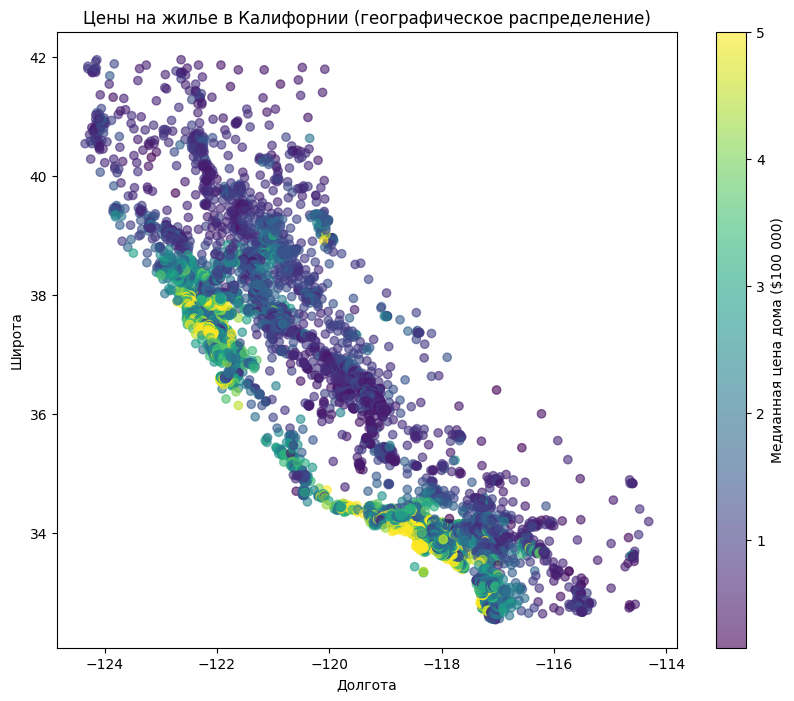

In [9]:
# Географическое распределение цен
plt.figure(figsize=(10,8))
plt.scatter(california['Longitude'], california['Latitude'],
           c=california['MedianValue'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Медианная цена дома ($100 000)')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Цены на жилье в Калифорнии (географическое распределение)')
plt.show()

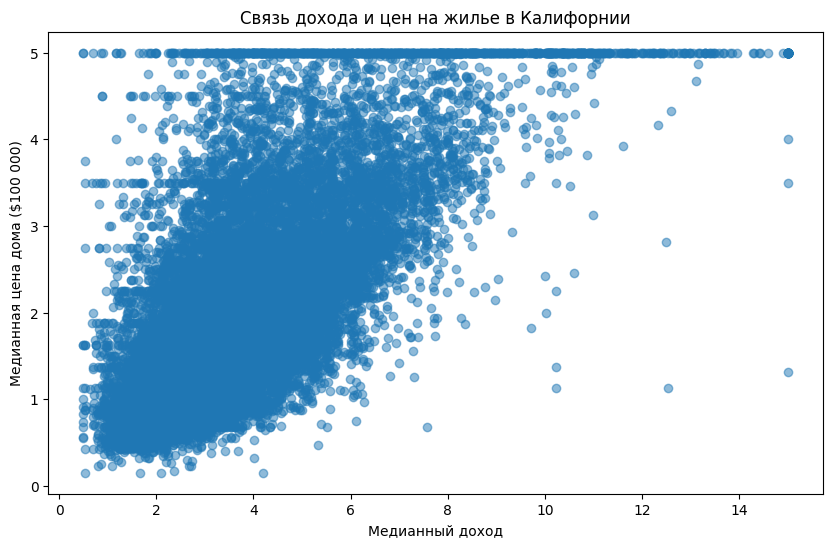

In [10]:
# Влияние дохода на цены
plt.figure(figsize=(10,6))
plt.scatter(california['MedInc'], california['MedianValue'], alpha=0.5)
plt.xlabel('Медианный доход')
plt.ylabel('Медианная цена дома ($100 000)')
plt.title('Связь дохода и цен на жилье в Калифорнии')
plt.show()

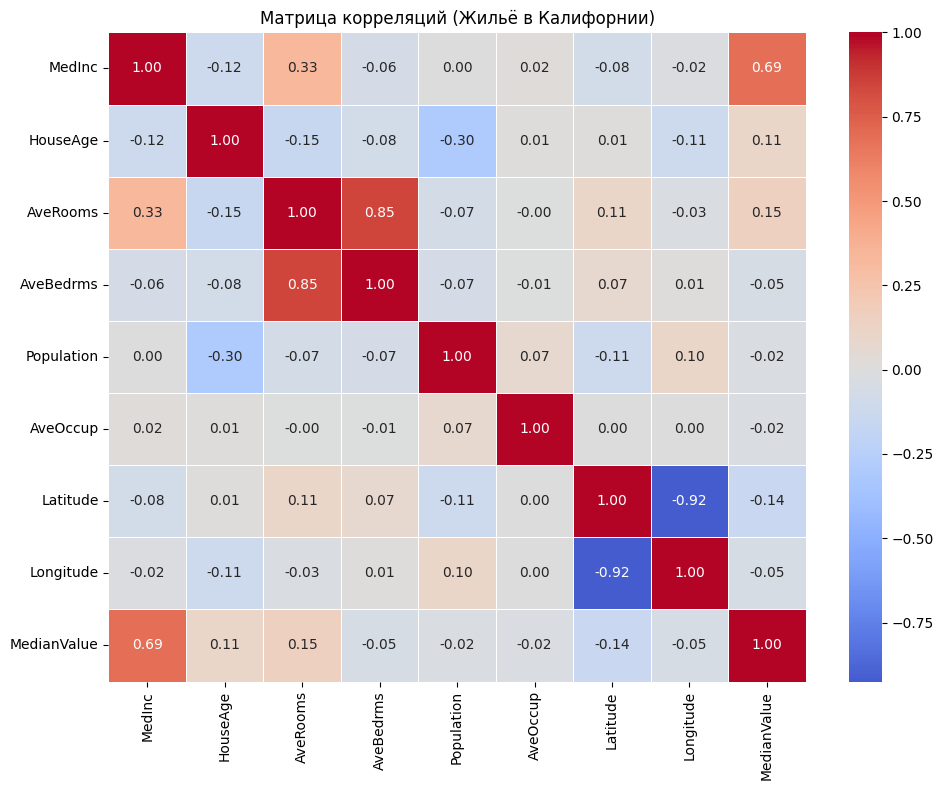

In [11]:
# Матрица теплоты корреляций
plt.figure(figsize=(10,8))
sns.heatmap(california.corr(), annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций (Жильё в Калифорнии)')
plt.tight_layout()
plt.show()

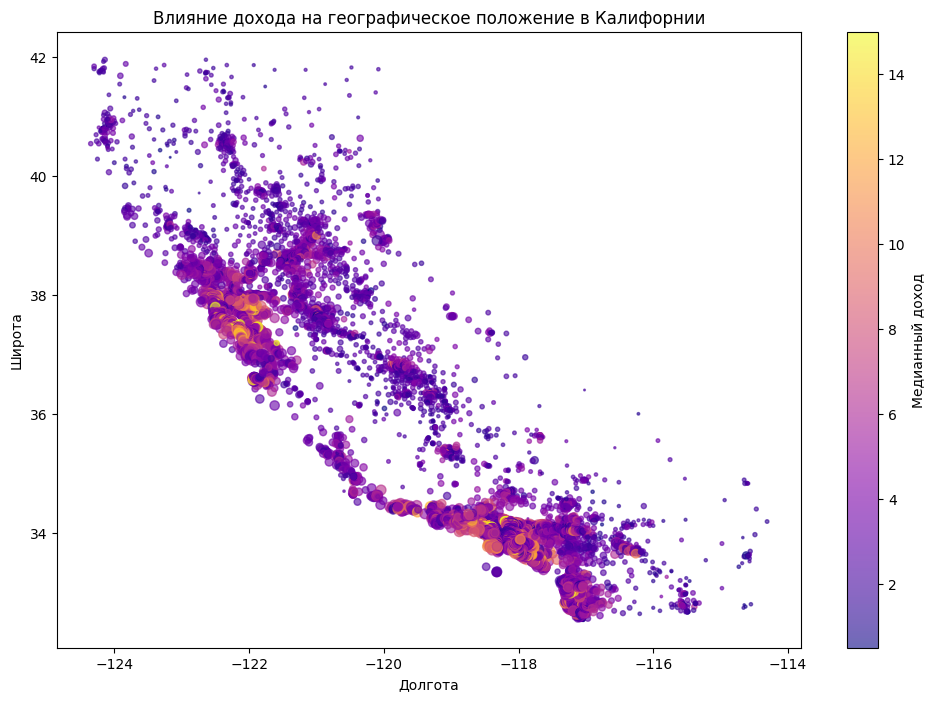

In [12]:
# Влияние дохода на географическое положение

plt.figure(figsize=(12,8))
scatter = plt.scatter(california['Longitude'], california['Latitude'],
                     c=california['MedInc'], s=california['MedianValue']*10,
                     cmap='plasma', alpha=0.6)
plt.colorbar(scatter, label='Медианный доход')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.title('Влияние дохода на географическое положение в Калифорнии')
plt.show()

Text(0.5, 1.0, 'Распределение цен в Северной и Южной Калифорнии')

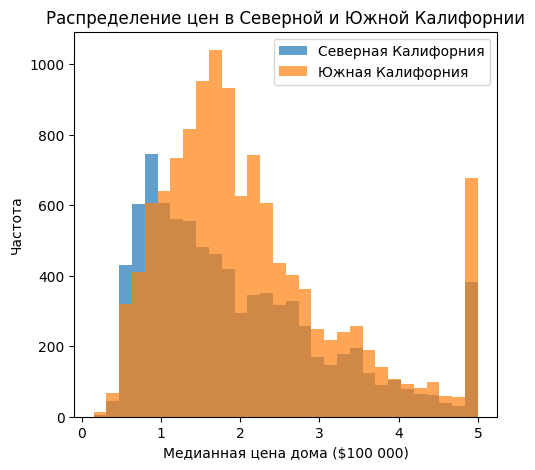

In [13]:
# Разделение на Северную/Южную Калифорнию
northern_ca = california[california['Latitude'] > 36.5]  # Северная Калифорния
southern_ca = california[california['Latitude'] <= 36.5]  # Южная Калифорния

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(northern_ca['MedianValue'], bins=30, alpha=0.7, label='Северная Калифорния')
plt.hist(southern_ca['MedianValue'], bins=30, alpha=0.7, label='Южная Калифорния')
plt.xlabel('Медианная цена дома ($100 000)')
plt.ylabel('Частота')
plt.legend()
plt.title('Распределение цен в Северной и Южной Калифорнии')

In [14]:
# Анализируем выбросы перед анализом влияния количества комнат на стоимость жилья
print("Анализ выбросов в количестве комнат:")
print(f"95-й перцентиль: {california['AveRooms'].quantile(0.95):.2f}")
print(f"99-й перцентиль: {california['AveRooms'].quantile(0.99):.2f}")
print(f"Максимум: {california['AveRooms'].max():.2f}")
print(f"Доля данных > 10 комнат: {(california['AveRooms'] > 10).mean()*100:.1f}%")

Анализ выбросов в количестве комнат:
95-й перцентиль: 7.64
99-й перцентиль: 10.36
Максимум: 141.91
Доля данных > 10 комнат: 1.1%


Исключено 207 выбросов из 20640 записей


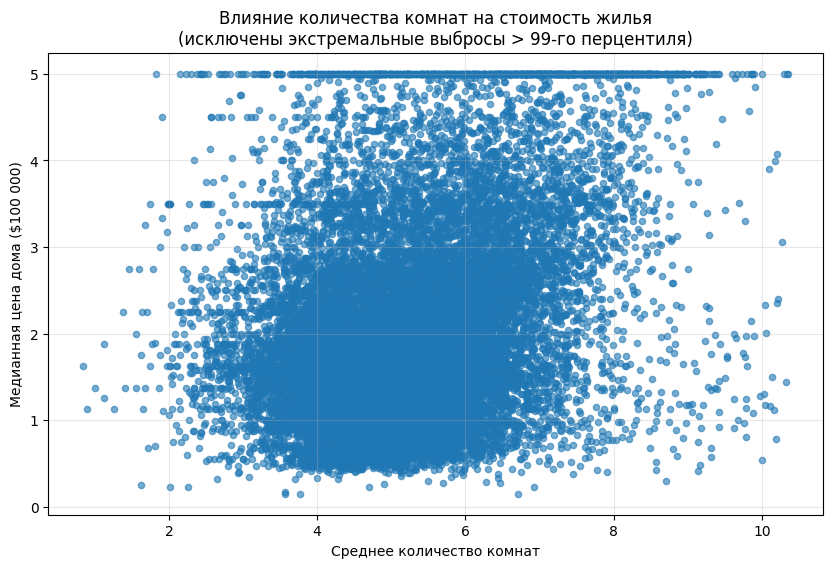

In [15]:
# Анализ влияния количества комнат на стоимость жилья
# Оптимальный подход
q99 = california['AveRooms'].quantile(0.99)
filtered_data = california[california['AveRooms'] <= q99]

print(f"Исключено {len(california) - len(filtered_data)} выбросов из {len(california)} записей")

plt.figure(figsize=(10,6))
plt.scatter(filtered_data['AveRooms'], filtered_data['MedianValue'], alpha=0.6, s=20)
plt.xlabel('Среднее количество комнат')
plt.ylabel('Медианная цена дома ($100 000)')
plt.title('Влияние количества комнат на стоимость жилья\n(исключены экстремальные выбросы > 99-го перцентиля)')
plt.grid(True, alpha=0.3)
plt.show()

<Figure size 1200x1000 with 0 Axes>

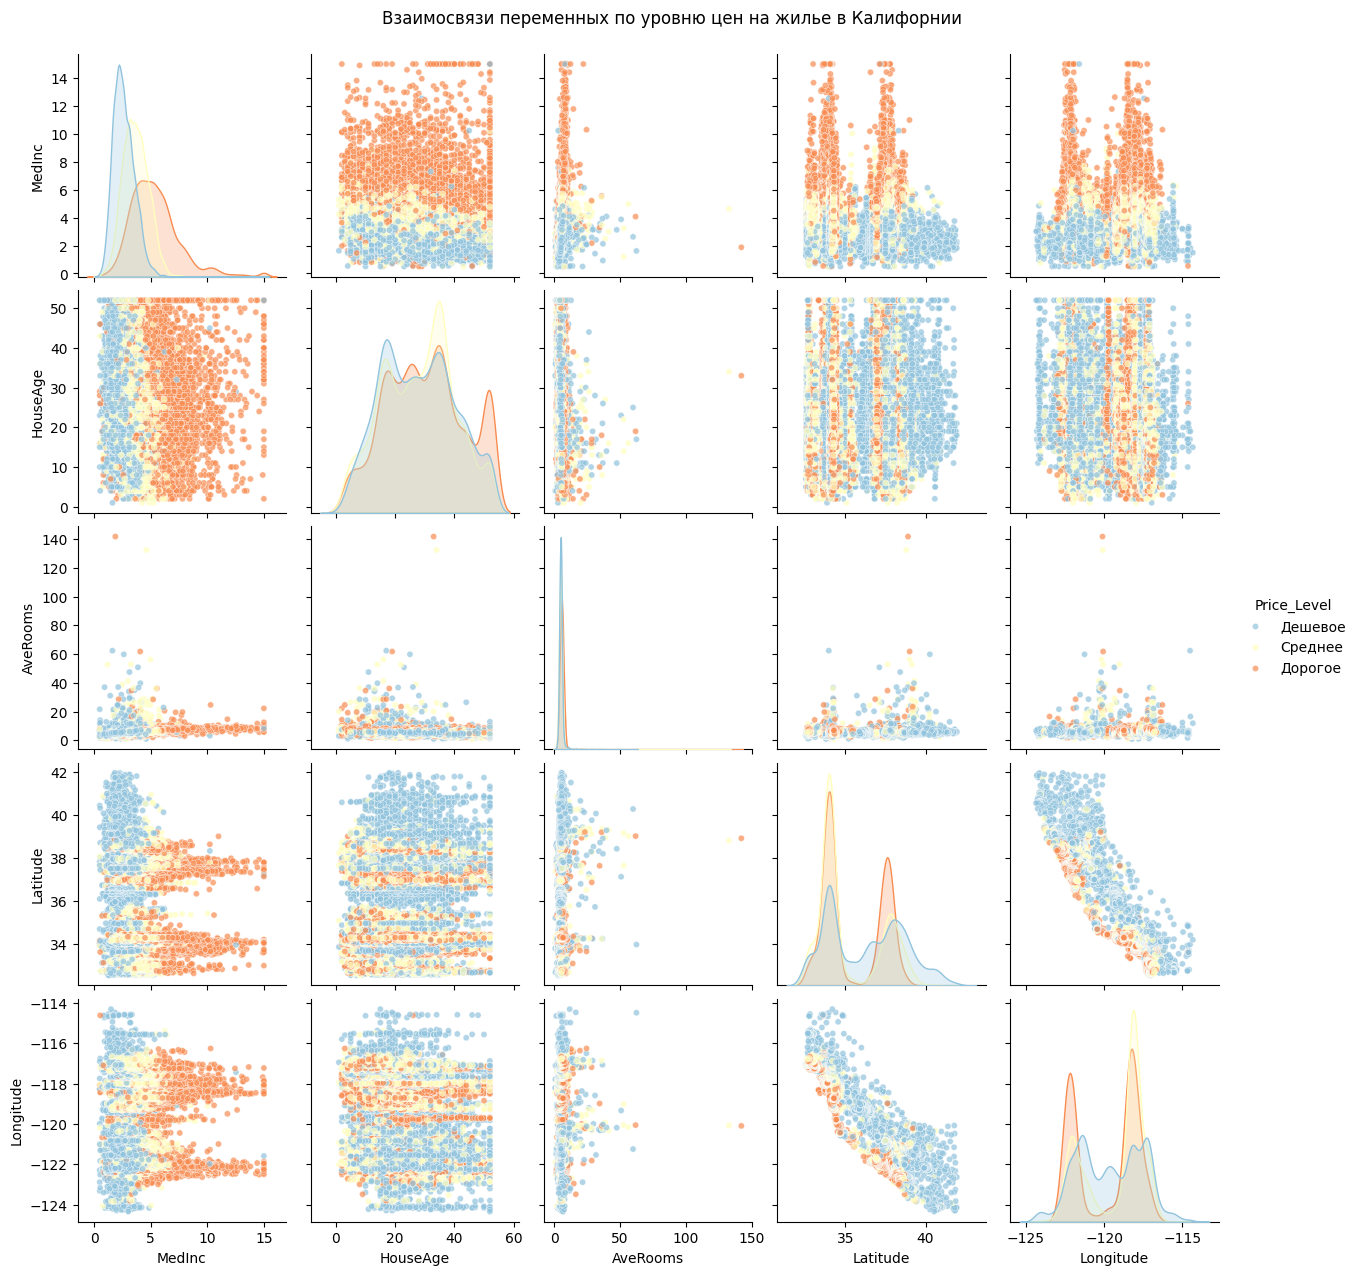

In [16]:
# Взаимосвязи переменных по уровню цен на жилье в Калифорнии
california['Price_Level'] = pd.qcut(california['MedianValue'], 3,
                                   labels=['Дешевое', 'Среднее', 'Дорогое'])

plt.figure(figsize=(12, 10))
sns.pairplot(california[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'Longitude', 'Price_Level']],
             hue='Price_Level',
             palette='RdYlBu_r',
             diag_kind='kde',
             plot_kws={'alpha': 0.7, 's': 20})
plt.suptitle('Взаимосвязи переменных по уровню цен на жилье в Калифорнии', y=1.02)
plt.show()

In [17]:
# Фиксируем seed
random_state=2019
np.random.seed(random_state)

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    data_california_housing.data,
    data_california_housing.target,
    test_size=0.2, # 20% данных - тестовая выборка, 80% - обучающая
      # дополнительная фиксируем seed
)

# Создаем удобные DataFrame
california_train = pd.DataFrame(X_train, columns=data_california_housing.feature_names)
california_train['MedianValue'] = y_train

california_test = pd.DataFrame(X_test, columns=data_california_housing.feature_names)
california_test['MedianValue'] = y_test

print("Размеры выборок:")
print(f"Обучающая: {california_train.shape}")
print(f"Тестовая: {california_test.shape}")

# Проверяем распределение целевой переменной
print("\nРаспределение цен:")
print("Обучающая выборка - Среднее:", california_train['MedianValue'].mean())
print("Тестовая выборка - Среднее:", california_test['MedianValue'].mean())

Размеры выборок:
Обучающая: (16512, 9)
Тестовая: (4128, 9)

Распределение цен:
Обучающая выборка - Среднее: 2.06770800750969
Тестовая выборка - Среднее: 2.071958815406977


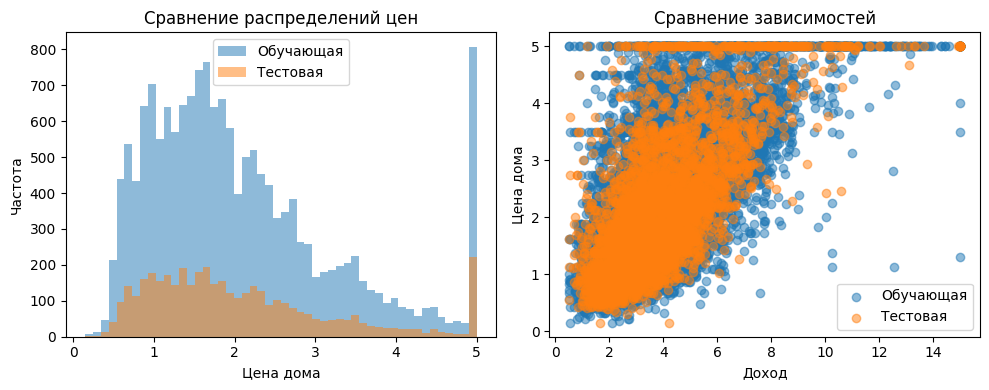

In [19]:
# Проверка качества разделения выборки
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(california_train['MedianValue'], bins=50, alpha=0.5, label='Обучающая')
plt.hist(california_test['MedianValue'], bins=50, alpha=0.5, label='Тестовая')
plt.xlabel('Цена дома')
plt.ylabel('Частота')
plt.legend()
plt.title('Сравнение распределений цен')

plt.subplot(1, 2, 2)
plt.scatter(california_train['MedInc'], california_train['MedianValue'], alpha=0.5, label='Обучающая')
plt.scatter(california_test['MedInc'], california_test['MedianValue'], alpha=0.5, label='Тестовая')
plt.xlabel('Доход')
plt.ylabel('Цена дома')
plt.legend()
plt.title('Сравнение зависимостей')

plt.tight_layout()
plt.show()